In [1]:
import pandas as pd
import numpy as py
import seaborn as sb
import matplotlib.pyplot as plt

# now load the data set. 

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# We can see that Age,Cabin,Embarked are the columns which have Nan values.

Now out of these Embarked has the lowest percentage. 

In [22]:
# calculating the mdoe for embarked. 

df.Embarked.mode()

0    S
dtype: object

A very common way is to fill these values with the central tendancy measures: mean, median, mode. 

Mean media couldnt be calculated for the Embarked hence i used the mode central tendancy. 

In [18]:
df.Embarked = df.Embarked.fillna('S')

using the fillna() function we filled the Null values with the mode of the attribute. 

In [19]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

hence here u can see that the null values of the embarked becoming 0

In [23]:
df.Age.mode()

0    24.0
dtype: float64

In [24]:
df.Age.mean()

29.69911764705882

In [25]:
df.Age.median()

28.0

here we have all the 3 central tendancies of the # age atteribute... hence i can fill null values with any one of the following. 

In [27]:
df.Age = df.Age.fillna('28')

In [28]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

above u can now see that even the Age has no null values.  
hence operation succeeded. 

# now taking on Cabin

In [36]:
df.Cabin.mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [37]:
df.Cabin.mode()[0]

'B96 B98'

In [38]:
df.Cabin = df.Cabin.fillna('B96 B98')

In [39]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

hence the data preprocessing is complete here!! 

# -----------------------------------------------------------------------------------------------------------

Lets understand how the attributes are correlated with each other.

Let us use matplotlib to plot the heat map. 

<AxesSubplot:>

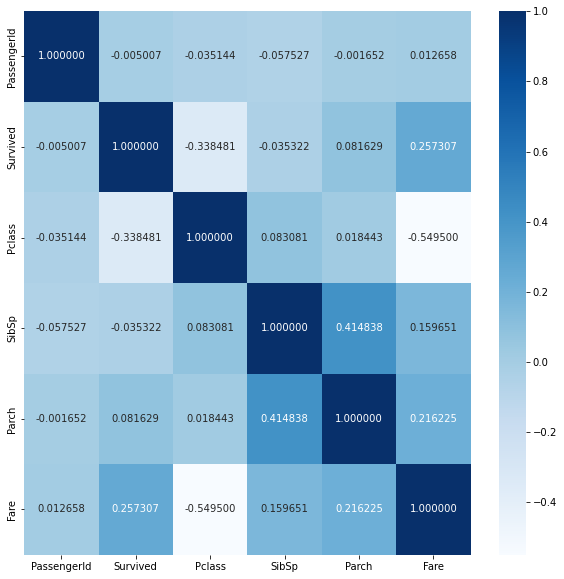

In [50]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr(),annot=True,fmt='f',cmap='Blues')

We are understanding the correlation using the function df.corr().

heatmap which gives range of values between -1 to 1 wherein 0 to 1---> Positive corr -1 to 0 ---> Negative Corr

Negative corr does not mean less correlated,it means there is indirect relationship between the two variables taken in consideration

<AxesSubplot:xlabel='Fare', ylabel='Count'>

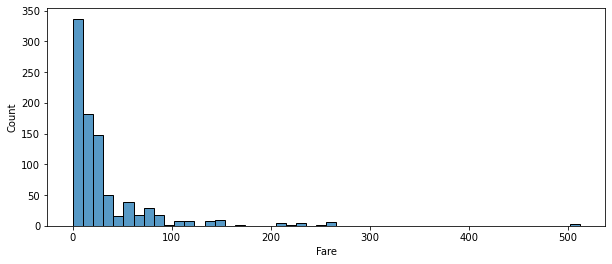

In [59]:
plt.figure(figsize= (10,4))
sb.histplot(df.Fare, bins=50)

#### This is a classic right skewed distribution.We can understand if the distribution is right or left or normal by doing simple stat calculation.

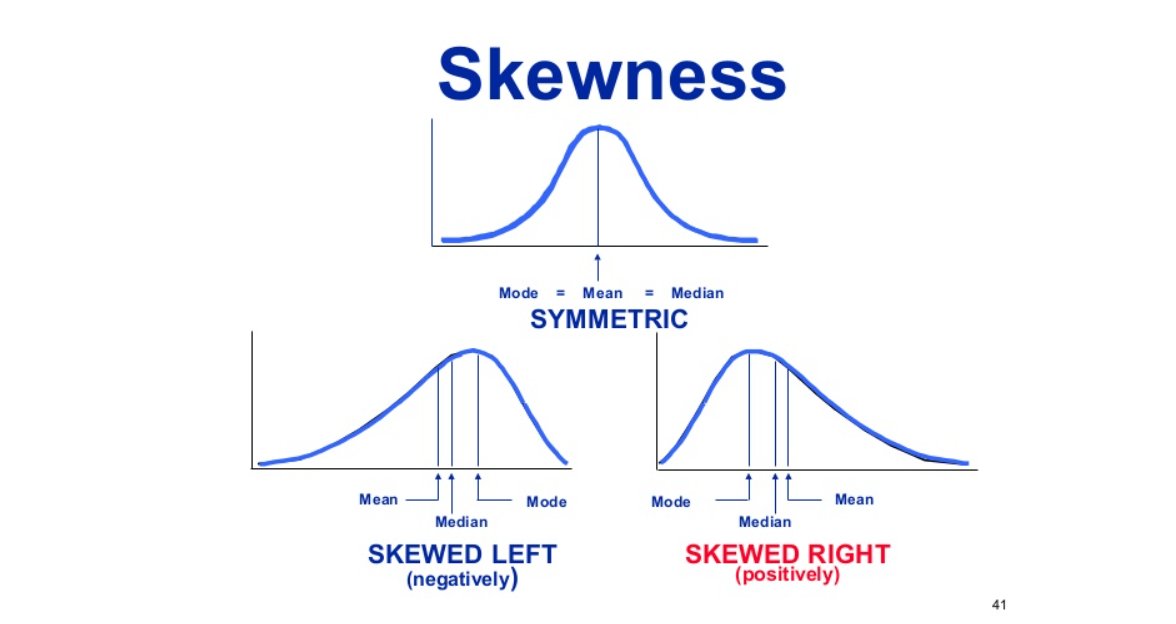

<AxesSubplot:xlabel='Age', ylabel='Count'>

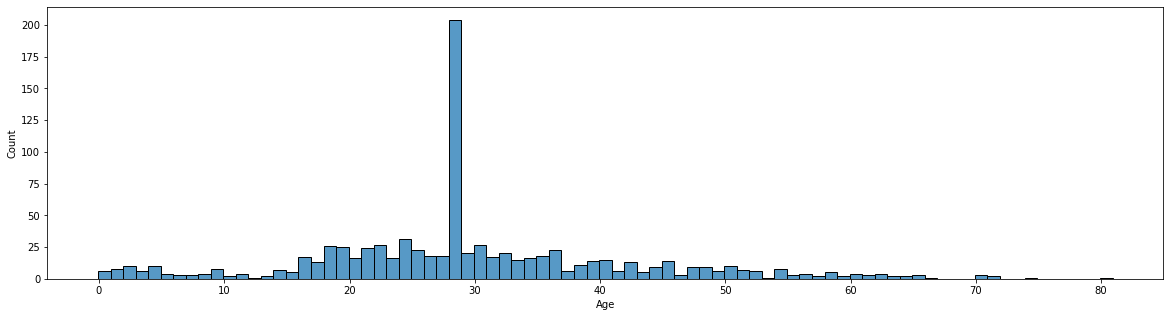

In [69]:
plt.figure(figsize=(20,5))
sb.histplot(df.Age)

C:\Users\deven\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

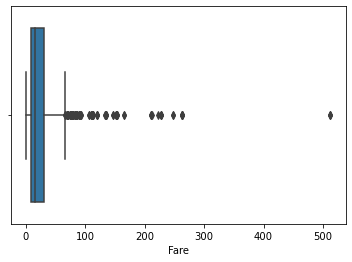

In [71]:
plt.figure()
sb.boxplot(df.Fare)